<a href="https://colab.research.google.com/github/younhuiji/openCV/blob/main/%5B1%5Dtensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:image.png)

In [ ]:
import tensorflow as tf
import numpy as np

print(f'현재 텐서플로우 버전은? {tf.__version__}')

현재 텐서플로우 버전은? 2.13.0


In [ ]:
a = tf.constant(2) # 텐서를 선언합니다.
b = tf.constant([1, 2])
c = tf.constant([[1, 2], [3, 4]])

print(tf.rank(a)) # 텐서의 랭크를 계산합니다.
print(tf.rank(b))
print(tf.rank(c))

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
a = tf.constant(3)
b = tf.constant(2)

print(tf.add(a, b)) # 더하기
print(tf.subtract(a, b)) # 빼기
print(tf.multiply(a, b).numpy()) # 곱하기
print(tf.divide(a, b).numpy()) # 나누기

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
6
1.5


In [ ]:
type(tf.multiply(a, b).numpy())

numpy.int32

- 넘파이 형태 배열로 변환하여 사용해보기
  - numpy()와 convert_to_tensor() 함수
  - 변환이 매우 유연


In [ ]:
c = tf.add(a, b).numpy() # a와 b를 더한 후 NumPy 배열 형태로 변환합니다.
c_square = np.square(c, dtype = np.float32) # NumPy 모듈에 존재하는 square(제곱) 함수를 적용합니다.
c_tensor = tf.convert_to_tensor(c_square) # 다시 텐서로 변환해줍니다.

# 넘파이 배열과 텐서 각각을 확인하기 위해 출력합니다.
print(f'numpy array : {c}, applying square with numpy : {c_square}, convert_to_tensor : {c_tensor}')

numpy array : 5, applying square with numpy : 25.0, convert_to_tensor : 25.0


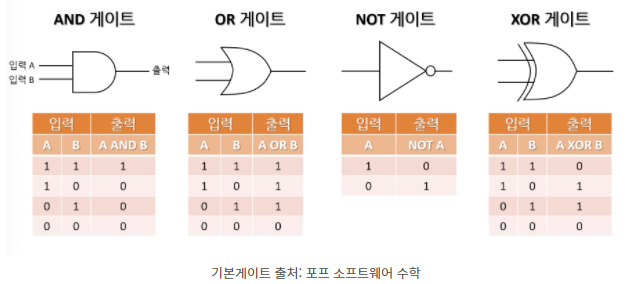

In [ ]:
# OR 게이트의 데이터와 정답을 가지고 텐서가 가진 알고리즘을 활용해서 정답, 예측값 확인해보자.
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

tf.random.set_seed(777)

# 데이터 준비하기
data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
label = np.array([[0], [1], [1], [1]])

# 모델 구성하기
model = Sequential()
model.add(Dense(1, input_shape = (2, ), activation = 'linear')) # 단층 퍼셉트론을 구성합니다

# 모델 준비하기
model.compile(optimizer = SGD(), loss = mse, metrics = ['acc']) # list 형태로 평가지표를 전달합니다

# 학습시키기
model.fit(data, label, epochs = 200)

Epoch 1/200
1/1 [==============================] - 5s 5s/step - loss: 1.5941 - acc: 0.2500
Epoch 2/200
1/1 [==============================] - 0s 20ms/step - loss: 1.5070 - acc: 0.2500
Epoch 3/200
1/1 [==============================] - 0s 14ms/step - loss: 1.4254 - acc: 0.2500
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 1.3488 - acc: 0.2500
Epoch 5/200
1/1 [==============================] - 0s 24ms/step - loss: 1.2769 - acc: 0.2500
Epoch 6/200
1/1 [==============================] - 0s 12ms/step - loss: 1.2094 - acc: 0.2500
Epoch 7/200
1/1 [==============================] - 0s 13ms/step - loss: 1.1462 - acc: 0.2500
Epoch 8/200
1/1 [==============================] - 0s 12ms/step - loss: 1.0868 - acc: 0.2500
Epoch 9/200
1/1 [==============================] - 0s 12ms/step - loss: 1.0310 - acc: 0.2500
Epoch 10/200
1/1 [==============================] - 0s 13ms/step - loss: 0.9787 - acc: 0.2500
Epoch 11/200
1/1 [==============================] - 0s 26ms/step - loss

In [ ]:
model.get_weights()  # 모델 가중치 확인하기

[array([[0.14169155],
        [0.44370645]], dtype=float32),
 array([0.4940265], dtype=float32)]

In [ ]:
# evaluate(): 평가를 진행합니다
model.evaluate(data, label)

# predict(): 예측을 진행합니다.
preds = model.predict(data)
for a, b in zip(preds, label):
    print(f"예측값 {a} - 정답 {b}")

1/1 [==============================] - 0s 197ms/step
예측값 [0.4940265] - 정답 [0]
예측값 [0.63571805] - 정답 [1]
예측값 [0.93773293] - 정답 [1]
예측값 [1.0794245] - 정답 [1]


In [ ]:
# 내적 해보기
import tensorflow as tf

# uniform 분포에서 해당 크기만큼 난수를 생성합니다.
x = tf.random.uniform((10, 5))
w = tf.random.uniform((5, 3))
d = tf.matmul(x, w) # (10, 5) * (5, 3) -> (10, 3)

print(f'x와 w의 벡터 내적 결과 크기:{d.shape}')

x와 w의 벡터 내적 결과 크기:(10, 3)


In [ ]:
# 다층 퍼셉트론
import tensorflow as tf
tf.random.set_seed(777)

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse

# 데이터 준비하기
data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
label = np.array([[0], [1], [1], [0]])

# 모델 구성하기
model = Sequential()
model.add(Dense(32, input_shape = (2, ), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # 최종 활성함수 sigmoid로 변경

# 모델 준비하기
model.compile(optimizer = RMSprop(), loss = mse, metrics = ['acc'])

# 학습시키기
model.fit(data, label, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.2513 - acc: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2496 - acc: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.2482 - acc: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.2471 - acc: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2462 - acc: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2453 - acc: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 0.2446 - acc: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 0.2438 - acc: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2432 - acc: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 0.2425 - acc: 0.7500
Epoch 11/100
1/1 [==============================] - 0s 18ms/step - loss

In [ ]:
model.evaluate(data, label)

1/1 [==============================] - 0s 305ms/step - loss: 0.2010 - acc: 1.0000


[0.2009938359260559, 1.0]

In [ ]:
result = model.predict(data)
print(result)

1/1 [==============================] - 0s 101ms/step
[[0.46096876]
 [0.5494    ]
 [0.55969465]
 [0.44110534]]


### 활성화 함수
1. Sigmoid = 모든 실수값을 0.1로 변환시켜준다.
2. ReLu = 음수값을 0, 양수는 그대로
3. Tanh = [-1 ~ 1]범위로 압축
4. Softmax = 값을 확률 분포로 계산

Tip!

* 활성화 함수는 신경망의 은닉층과 출력층에도 사용된다.

* 은닉층에는 주로 ReLu, 출력층에는 (회귀, 분류) 선택적으로 사용

* 이진분류 출력층에서 Sigmoid, 다중 분류 Softmax



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 하이퍼볼릭탄젠트 함수
def tanh(x):
    return list(map(lambda x : math.tanh(x), x))
# lambda, map : https://wikidocs.net/64
#

# relu 함수
def relu(x):
    result = []
    for ele in x:
        if(ele <= 0):
            result.append(0)
        else:
            result.append(ele)

    return result

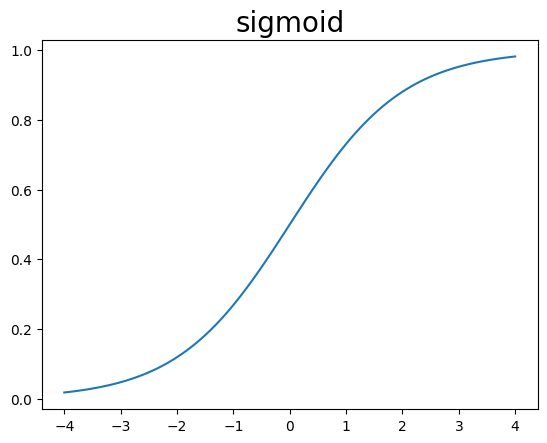

In [ ]:
# 시그모이드 함수 그려보기
x = np.linspace(-4, 4, 100)
sig = sigmoid(x)

plt.plot(x, sig); plt.title('sigmoid', fontsize = 20)
plt.show()

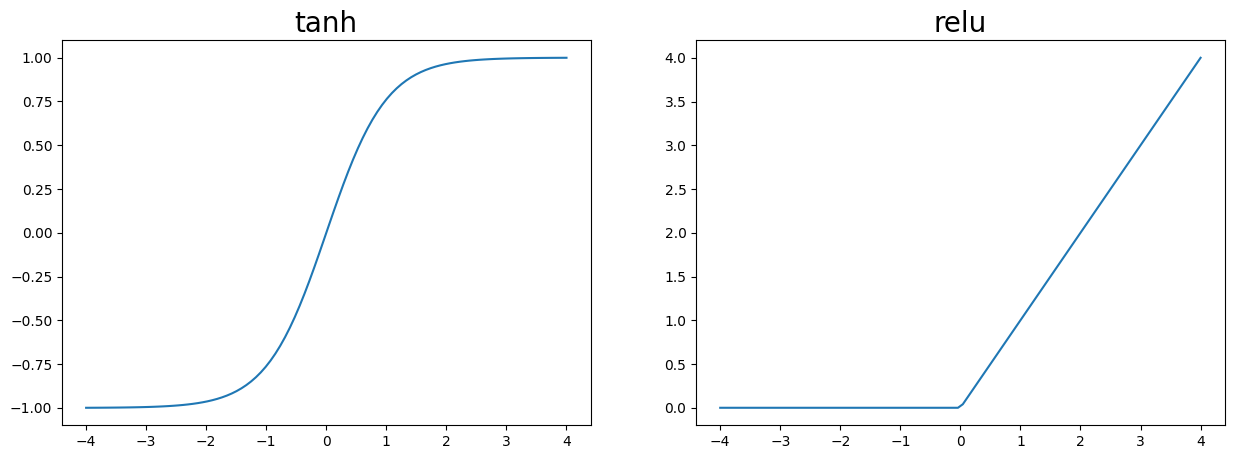

In [ ]:
x = np.linspace(-4, 4, 100)
tan_h = tanh(x)
relu_d = relu(x)

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(x, tan_h); plt.title('tanh', fontsize = 20)
plt.subplot(1, 2, 2)
plt.plot(x, relu_d); plt.title('relu', fontsize = 20)

plt.show()

### 2차 함수

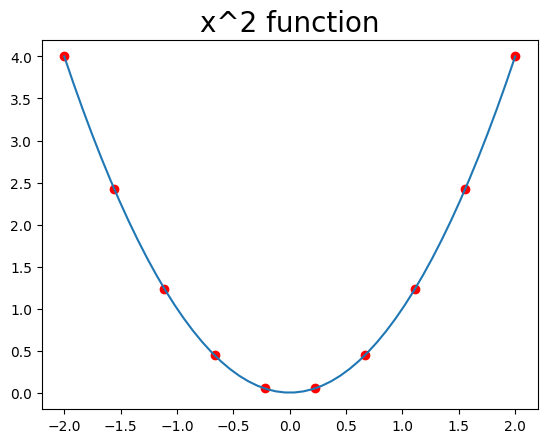

In [ ]:
# np.linspace(): 1차원의 배열 만들기
x = np.linspace(-2, 2, 50)
x_square = [i ** 2 for i in x]

x_2 = np.linspace(-2, 2, 10)
dev_x = [i ** 2 for i in x_2]

plt.title('x^2 function', fontsize = 20)
plt.plot(x, x_square)
fig = plt.scatter(x_2, dev_x, color = 'red')
plt.show()

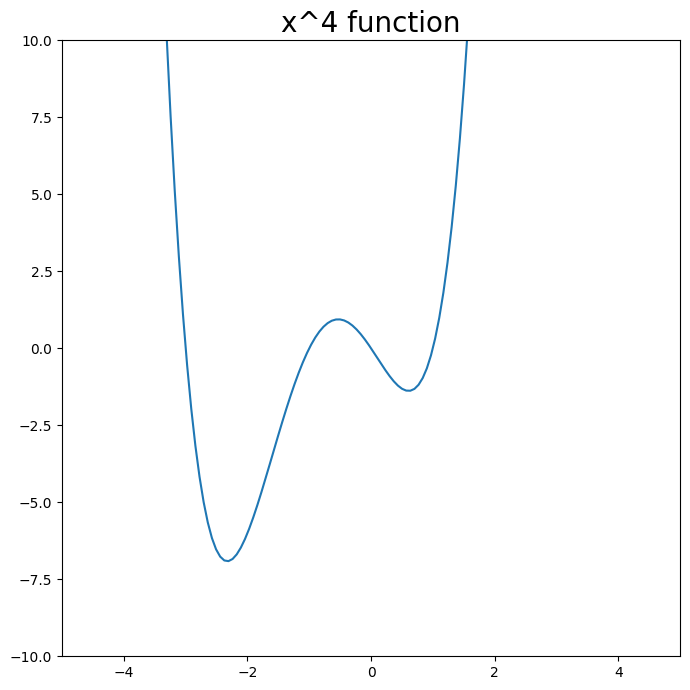

In [ ]:
x = np.linspace(-10, 10, 300)
four_func = [(i)*(i - 1)*(i + 1)*(i + 3) for i in x]

fig = plt.figure(figsize = (7, 7))
plt.title('x^4 function', fontsize = 20)
plt.plot(x, four_func)
plt.xlim(-5, 5)
plt.ylim(-10, 10)
frame1 = plt.gca()
plt.tight_layout() #  서브 플롯 크기 또는 간격을 개선하기 위해 Matplotlib에서 서브 플롯 크기를 개선
plt.show()

### 경사하강법 실험해보기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_derivative(lr):

    w_old = 2
    derivative = [w_old]

    y = [w_old ** 2] # 손실 함수를 y= x^2 로 정의합니다.

    for i in range(1, 10):
        # 먼저 해당 위치에서 미분값을 구합니다.
        dev_value = w_old * 2

        # 위의 값을 이용하여 가중치를 업데이트합니다.
        w_new = w_old - lr * dev_value
        w_old = w_new

        derivative.append(w_old) # 업데이트 된 가중치를 저장합니다.
        y.append(w_old ** 2) # 업데이트 된 가중치의 손실값을 저장합니다.

    return derivative, y

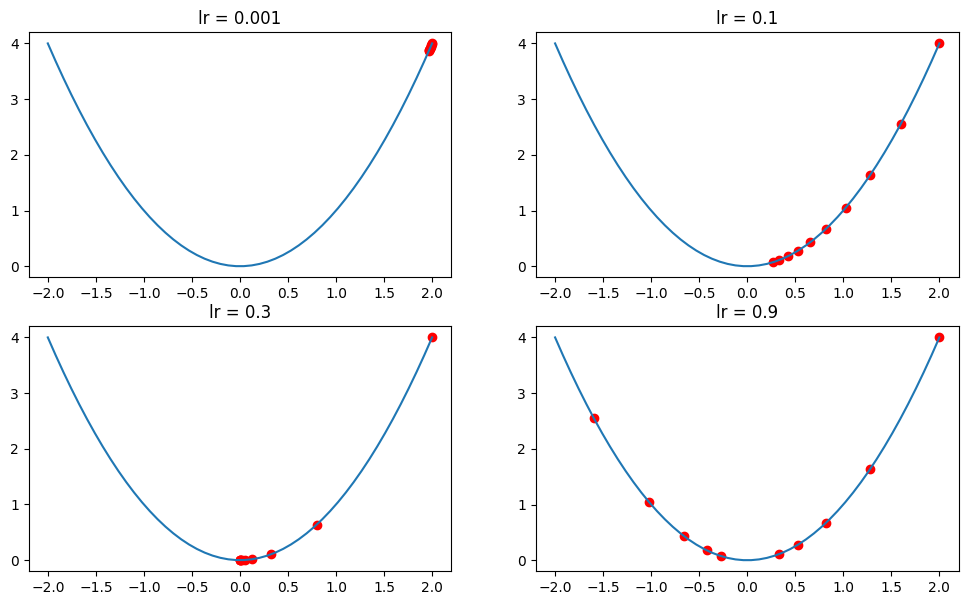

In [ ]:
# 여러 가지 학습률을 사용하여 값의 변화를 관찰해보도록 합니다.
lr_list = [0.001, 0.1, 0.3, 0.9]

x = np.linspace(-2, 2, 50) # -2 ~ 2의 범위를 50구간으로 나눈 배열을 반환합니다.
x_square = [i ** 2 for i in x]

fig = plt.figure(figsize = (12, 7))

for i, lr in enumerate(lr_list):
    derivative, y = get_derivative(lr)
    ax = fig.add_subplot(2, 2, i + 1)
    ax.scatter(derivative, y, color = 'red')
    ax.plot(x, x_square)
    ax.title.set_text('lr = ' + str(lr))

plt.show()